In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("IRIS.csv", header = 0)

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.species.nunique()

3

In [7]:
df.duplicated().sum()

3

In [8]:
df.shape

(150, 5)

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(147, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [13]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
X = df.drop('species', axis = 1)
y = df['species']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
ypred_test = model.predict(X_test)
ypred_train = model.predict(X_train)

In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, ypred_test))
print(accuracy_score(y_train, ypred_train))

from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv = 5).mean()

0.9666666666666667
0.9914529914529915


0.9590804597701149

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, ypred_test)
cm

array([[ 8,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 12]], dtype=int64)

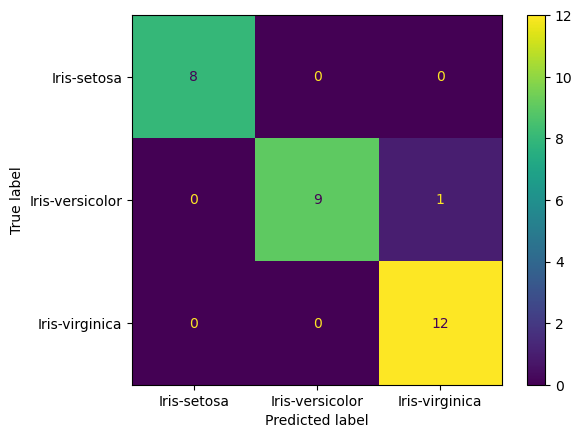

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels=df['species'].unique()).plot()
plt.show()

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

